- Load and Explore Your Dataset

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("Data/addiction_prediction_dataset.csv")

In [6]:
df.head()

,Age,Gender,Education Level,Hours per Day,Sessions per Day,Posts per Month,Scrolling Time (min),Night Usage,Notifications per Day,No. of Social Apps,Preferred App,Likes/Comments per Post,Time to Check After Waking (min),Mood After Use,Anxiety Score,Sleep Disturbance,Productivity Loss (%),Addiction Level
0,21,Male,College,8.2,19,43,81,True,40,7,LinkedIn,57,19,Irritable,7,True,79,High
1,25,Male,College,8.8,8,40,161,True,150,6,Instagram,52,2,Irritable,8,False,34,High
2,20,Female,Postgraduate,1.0,32,21,170,False,77,6,Twitter,43,25,Anxious,1,True,63,High
3,24,Female,College,1.4,32,16,24,True,70,4,Instagram,54,3,Relaxed,5,False,55,Medium
4,21,Male,College,2.5,11,18,141,True,108,4,Reddit,13,9,Relaxed,5,True,6,Medium


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

* Preprocess the Data

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [ ]:
print(df["Education Level"].unique())
print(df["Preferred App"].unique())

In [ ]:
df["Education Level"] = df["Education Level"].replace("Postgraduate", "Working")
df["Preferred App"] = df["Preferred App"].replace("TikTok", "Instagram")
print(df["Education Level"].unique())
print(df["Preferred App"].unique())

In [ ]:
df['Gender'] = encoder.fit_transform(df['Gender'])
print("Gender:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Education Level'] = encoder.fit_transform(df['Education Level'])
print("Education Level:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Night Usage'] = encoder.fit_transform(df['Night Usage'])
print("Night Usage:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Preferred App'] = encoder.fit_transform(df['Preferred App'])
print("Preferred App:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Mood After Use'] = encoder.fit_transform(df['Mood After Use'])
print("Mood After Use:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Sleep Disturbance'] = encoder.fit_transform(df['Sleep Disturbance'])
print("Sleep Disturbance:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Addiction Level'] = encoder.fit_transform(df['Addiction Level'])
print("Addiction Level:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

In [ ]:
df.head()

* Split the Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = df.drop(columns = ['Addiction Level'])
y = df['Addiction Level']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

* Choose and Train a Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100,random_state = 42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

* Test Model Accuracy

In [16]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       152
           1       1.00      0.60      0.75         5
           2       0.95      0.98      0.97        43

    accuracy                           0.98       200
   macro avg       0.98      0.86      0.90       200
weighted avg       0.99      0.98      0.98       200



Confusion Matrix:
[[152   0   0]
 [  0   3   2]
 [  1   0  42]]


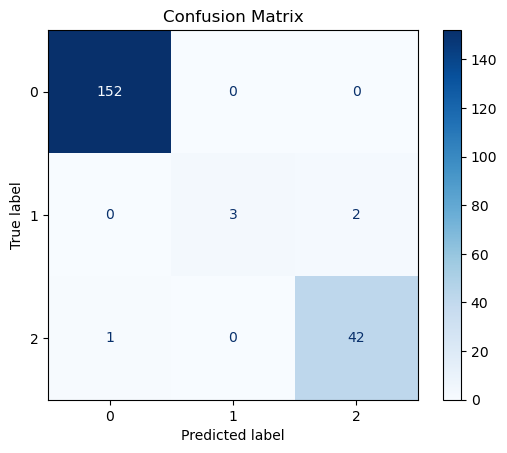

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


* Save the Model

In [20]:
import pickle

with open("addiction_prediction_model.pkl", "wb") as f:
    pickle.dump(model, f)

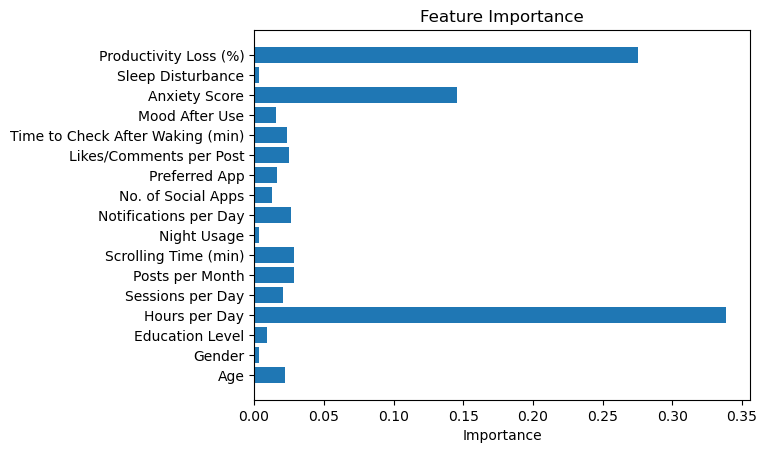

In [21]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.barh(x.columns, importance)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()